### Problem 1 [50 Points]

Consider a Bayesian model with parameters $\theta$ for which you want to maximize its marginal log-likelihood $\log p(\mathcal{D})$ given some observed data $\mathcal{D}$. As this objective is generally intractable, assume a variational approximation to
the posterior by introducing an auxiliary distribution $q(\theta\lvert\mathcal{D})$.

(1) Please derive the following inequality
:
$\log p(\mathcal{D}) \geq \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) $

(2) Show that the above inequality becomes an equality when the KL divergence between the true posterior and your variational posterior becomes 0, i.e.

$$\mathbb{KL}[q(\theta\lvert\mathcal{D})||p(\theta\lvert \mathcal{D})] = 0$$

(3) One way to design a more flexible variational approximation beyond the mean-field familty is by considering an invertible transformation $f_{\phi}: \mathcal{Z} \to \mathcal{\Theta}$, where $\phi$ denotes the parameters of the invertible transformation.Using the change of variables formula, we can obtain a variational approximation $q_{\phi}(\theta | \mathcal{D})$ that is easy to sample from and easy to evaluate as

\begin{align}
    \theta &= f(z), \quad \text{with}\; z \sim p_z(z), \\
    q_{\phi} (\theta | \mathcal{D}) &= p_z(f_{\phi}^{-1}(\theta)) | \mathrm{det} \nabla_\theta (f_{\phi}^{-1} (\theta))|.
\end{align}

Derive a tractable optimization objective for identifying the optimal parameters $\phi$ via gradient-based optimization assuming that $p_z = \mathcal{N}(0, I)$.

### Solution:

(1) The marginal likelihood is:
\begin{align}
    \log p(\mathcal{D}) &= \log \int_{\theta} p(\mathcal{D}, \theta) \\
                        &= \log \int_{\theta} p(\mathcal{D}, \theta) \frac{q(\theta \vert \mathcal{D})}{q(\theta \vert \mathcal{D})} \\
                        &= \log \left( \mathbb{E}_{q(\theta \vert \mathcal{D})} \left[\frac{ p(\mathcal{D}, \theta)}{q(\theta \vert \mathcal{D})}\right] \right)
\end{align}

Now, by Jensen's inequality, we have that when a function is concave,
\begin{align}
    f(\mathbb{E}[x]) \geq \mathbb{E}[f(x)]
\end{align}

Therefore, we can write
\begin{align}
    \log p(\mathcal{D}) &\geq \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log  p(\mathcal{D}, \theta)] - \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log q(\theta \vert \mathcal{D})] \\
\implies \log p(\mathcal{D}) &\geq \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log  p(\mathcal{D}\vert \theta) p(\theta)] - \mathbb{E}_{q(\theta \vert \mathcal{D})} [\log q(\theta \vert \mathcal{D})] \\
\implies \log p(\mathcal{D}) &\geq \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D})
\end{align}

(2) We can write the KL divergence as
\begin{align}
    \mathbb{KL} (q || p) &= \mathbb{E}_q \left[ \log \frac{q(\theta\lvert\mathcal{D})}{p(\theta \vert \mathcal{D})} \right] \\
    &= \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log q(\theta\lvert\mathcal{D})] - \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log p(\theta | \mathcal{D})] \\
    &= \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log q(\theta\lvert\mathcal{D})] - \mathbb{E}_{q(\theta\lvert\mathcal{D})} [\log\left(\frac{p(\mathcal{D} | \theta) p(\theta)}{p(\mathcal{D})}\right)] \\
    &= \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) + \log p(\mathcal{D})
\end{align}

If $\mathbb{KL}[q(\theta\lvert\mathcal{D})||p(\theta\lvert \mathcal{D})] = 0$, 
\begin{align}
\mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D}) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) + \log p(\mathcal{D}) = 0\\
\implies \log p(\mathcal{D}) = \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D})
\end{align}


(3) Following earlier, we can show that our variational approximation $q_{\phi}(\theta | \mathcal{D})$ would need to maximize the ELBO:

\begin{align}
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\mathcal{D}\lvert \theta) + \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log p(\theta) - \mathbb{E}_{q(\theta\lvert\mathcal{D})}\log q(\theta\lvert\mathcal{D})\right] \\
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) - \mathbb{E}_{q(\theta\lvert\mathcal{D})} \log (p_z(f_{\phi}^{-1}(\theta)) | \mathrm{det} \nabla_\theta (f_{\phi}^{-1} (\theta))|)\right] \\
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) - \mathbb{E}_{z \sim p_z(z)} \log (p_z(f_{\phi}^{-1}(f_{\phi}(z)))) - \mathbb{E}_{z \sim p_z(z)} \log | \mathrm{det} (\nabla_z (f_{\phi} (z)))^{-1}|\right] \\
    \phi^\star &= \mathrm{argmax}_{\phi} \left[\mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) - \mathbb{E}_{z \sim p_z(z)} \log (p_z(z)) + \mathbb{E}_{z \sim p_z(z)} \log | \mathrm{det} \nabla_z (f_{\phi} (z))|\right]
\end{align}

From above, we can use either Equation (2) or Equation (4) for evaluating the loss function. A main objective we want to pursue is ensuring that we can compute the determinant of the Jacobian easily (by choosing invertible transformations whose Jacobian matrix is diagonal or lower triangluar, see for e.g. the [RealNVP](https://arxiv.org/pdf/1605.08803.pdf) architecture). Dropping terms that aren't dependent on $\phi$, we have that the objective function to maximize is
\begin{align}
    \mathcal{L}(\phi) = \mathbb{E}_{z \sim p_z (z)}\log p(\mathcal{D}\lvert f_{\phi} (z)) + \mathbb{E}_{z \sim p_z (z)} \log p(f_{\phi}(z)) + \mathbb{E}_{z \sim p_z(z)} \log | \mathrm{det} \nabla_z (f_{\phi} (z))|
\end{align}

The expectations above can be calculated suitably by Monte Carlo estimation.

### Problem 2 [50 points]

Consider a Bayesian regression model with a likelihood $p(y\lvert x, \alpha, \beta, \gamma)$ corresponding to a linear observation model is $y = \alpha x + \beta + \epsilon$. Noting that $\gamma$ represents the noise level in the observed data, i.e. it corresponds to the precision of the data likelihood. In this case, the likelihood can be further expressed as:

$p(y\lvert x, \alpha, \beta, \gamma) = (\sqrt{\frac{\gamma}{2\pi}})^n\exp(-\frac{\gamma(\sum_{i=1}^n\|y_i - x_i\alpha - \beta\|^2_2)}{2})$

while the conditional posteriors are:

$p(\alpha\lvert x, y, \beta, \gamma) = \mathcal{N}(\mu_1,\frac{1}{\lambda_1})$, where $\mu_1 = \frac{\gamma \sum_{i=1}^{n}x_i(y_i-\beta)}{1+\gamma \sum_{i=1}^{n}x_i^2}$ and $\lambda_1 = 1+\gamma \sum_{i=1}^{n}x_i^2$

$p(\beta\lvert x, y, \alpha, \gamma) = \mathcal{N}(\mu_2,\frac{1}{\lambda_2})$ where $\mu_2 = \frac{\gamma \sum_{i=1}^{n}(y_i-x_i\alpha)}{n\gamma+1}$ and $\lambda_2 = n\gamma+1$

$p(\gamma\lvert x, y, \alpha, \beta) =  \text{Gam}(a,b)$ where $a=\frac{n}{2}+2$ and $b = \frac{1}{2}[2+\sum_{i=1}^{n}(y_i-x_i\alpha-\beta)^2]$

Generate your training data by considering true parameters $\alpha, \beta, \gamma = 1.5, -3, 1$. Considering a uniform distribution, randomly sample $x$ in $[0, 3]$ using $N = 200$

(1) Implement the Gibbs sampling algorithms using the above conditional posteriors to generate $5,000$ samples from the target posterior distribution $p(\alpha,\beta,\gamma\lvert x, y)$. Discard the first 2,000 as a burn-in phase and plot a histogram generated from your samples. Also, please draw some samples of linear lines using $50$ samples you got.

(2) Gibbs sampling depends on deriving an analytical expression of the corresponding conditional posterior distributions. However, this cannot be done in many applications. Assume that you only have access to the unnormalized posterior, using the likelihood listed above and prior distributions: $p(\alpha) = \mathcal{N}(0, 1)$, $p(\beta) = \mathcal{N}(0, 1)$ and $p(\gamma) = \textrm{Gam(2, 1)}$. Implement the Metropolis algorithm to sample $5,000$ samples from the target posterior distribution $p(\alpha,\beta,\gamma\lvert x, y)$.  Discard the first 2,000 as a burn-in phase and plot a histogram generated from your samples. Please compare these histograms with the plots from Gibbs sampling. Also, please draw some samples of linear lines using $50$ samples you got.

### Solution:

In [2]:
import jax.numpy as jnp
from jax import random
from tqdm.notebook import trange
import numpy as onp
import matplotlib.pylab as plt
import jax
%matplotlib inline

In [3]:
# True Parameters
# This is what we are using to generate the data:
alpha_true = 1.5
beta_true  = -3.0
gamma_true = 1

# Bounds for the domain:
x_min = 0
x_max = 3
N     = 200

# Data Generation
keys  = random.split(random.PRNGKey(1))
xs    = random.uniform(keys[0], shape=(N,), minval=x_min, maxval=x_max)
noise = random.normal(keys[1], shape=(N,)) / jnp.sqrt(gamma_true)
ys    = (alpha_true * xs) + beta_true + noise

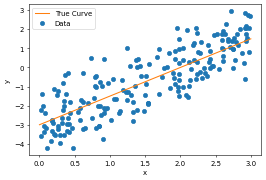

In [4]:
# Visualization
plt.figure(dpi = 50)
plt.scatter(xs, ys, label='Data')
plt.plot(jnp.linspace(x_min, x_max),
        alpha_true * jnp.linspace(x_min, x_max) + beta_true,
        label = 'True Curve', color = 'C1'
        )
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [5]:
# Initial values of alpha, beta and gamma:
a, b, g = [0., 0., 1.]
key = random.PRNGKey(0)
# List to store the values returned by Gibbs sampling:
par_stor = []
for i in trange(5000):
    # Splitting so that we are generating different samples upon iteration
    key, _ = random.split(key)
    # Splitting to get keys for alpha, beta and gamma:
    keys = random.split(key, 3)

    # Sampling alpha:
    lam_1 = 1 + g * jnp.sum(xs**2)
    mu_1  = g * jnp.sum(xs * (ys - b)) / lam_1
    a     = random.normal(key = keys[0]) * jnp.sqrt(1 / lam_1) + mu_1

    # Sampling beta:
    lam_2 = N * g + 1
    mu_2  = g * jnp.sum(ys - xs * a) / lam_2
    b     = random.normal(key = keys[1]) * jnp.sqrt(1 / lam_2) + mu_2

    # Sampling gamma:
    g = random.gamma(key = keys[2], a = N/2 + 2) \
      / (1 + 0.5 * jnp.sum((ys - xs * a - b)**2))

    par_stor.append([a,b,g])

par_stor = jnp.array(par_stor)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [6]:
# Discounting samples from burn-in:
par_stor = par_stor[2000:]
# Getting mean of the samples we drew:
print(par_stor.mean(0))

[ 1.5373647 -3.0284505  1.0821626]


(array([  2.,   6.,   2.,  17.,  18.,  24.,  36.,  48.,  70.,  91., 112.,
        137., 167., 183., 200., 201., 175., 201., 190., 190., 151., 127.,
        125., 111.,  85.,  84.,  52.,  39.,  46.,  23.,  26.,  18.,  11.,
          4.,   7.,  12.,   1.,   6.,   1.,   1.]),
 array([0.77910167, 0.79656184, 0.814022  , 0.83148223, 0.8489424 ,
        0.86640257, 0.88386273, 0.9013229 , 0.91878307, 0.9362433 ,
        0.95370346, 0.97116363, 0.9886238 , 1.006084  , 1.0235442 ,
        1.0410043 , 1.0584645 , 1.0759246 , 1.0933849 , 1.1108451 ,
        1.1283052 , 1.1457654 , 1.1632255 , 1.1806858 , 1.198146  ,
        1.2156061 , 1.2330663 , 1.2505264 , 1.2679867 , 1.2854469 ,
        1.302907  , 1.3203672 , 1.3378273 , 1.3552876 , 1.3727477 ,
        1.3902079 , 1.4076681 , 1.4251282 , 1.4425884 , 1.4600486 ,
        1.4775088 ], dtype=float32),
 <BarContainer object of 40 artists>)

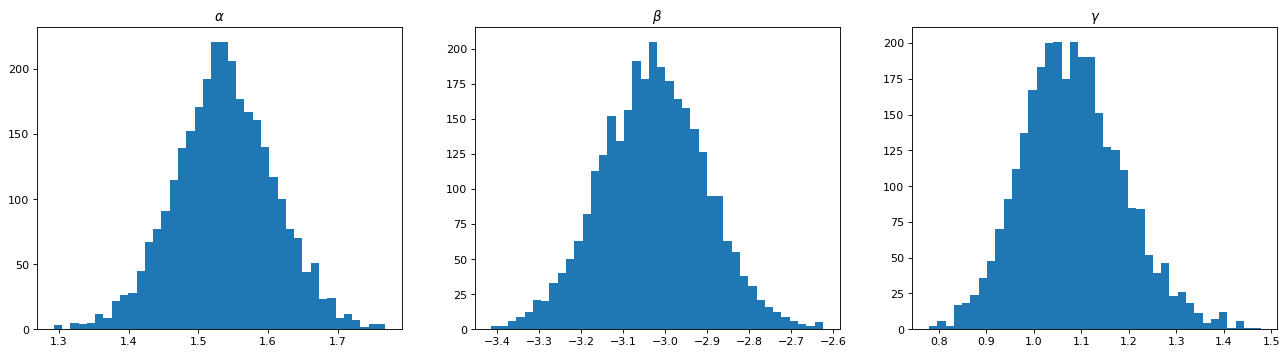

In [8]:
par_stor = onp.array(par_stor)

plt.figure(figsize = (20,5), dpi = 80)
plt.subplot(1, 3, 1)
plt.title(r'$\alpha$')
plt.hist(par_stor[:, 0].flatten(), bins = 40)
plt.subplot(1, 3, 2)
plt.title(r'$\beta$')
plt.hist(par_stor[:, 1].flatten(), bins = 40)
plt.subplot(1, 3, 3)
plt.title(r'$\gamma$')
plt.hist(par_stor[:, 2].flatten(), bins = 40)

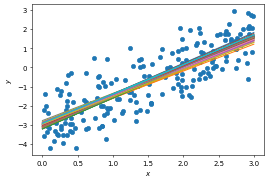

In [9]:
# Drawing lines using the samples we have:
plt.figure(dpi = 50)
plt.scatter(xs, ys, label='Data')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

for i in onp.random.randint(0, 3000, size = 50):
    plt.plot(onp.linspace(x_min, x_max), 
            par_stor[i,0] * onp.linspace(x_min, x_max) + par_stor[i,1]
           )

In [10]:
# Using the metropolis function as discussed in class:
from jax import jit, vmap
from jax.lax import scan, cond
from functools import partial
def metropolis(log_prob, sigma):
    def init(rng_key, bounds):
        lb, ub = bounds
        dim = lb.shape[0]
        x0 = random.uniform(rng_key, (dim,), minval=lb, maxval=ub)
        return x0
    @partial(jit, static_argnums=(0,))
    def sample(num_samples, rng_key, init_state):
        def kernel(carry, i):
            key, state, logp = carry
            key, subkey = random.split(key)
            x = state + sigma * random.normal(subkey, state.shape)
            logp_prop = log_prob(x)
            u = random.uniform(key)
            cond = (u < jnp.exp(logp_prop - logp))
            state = jnp.where(cond, x, state)
            logp = jnp.where(cond, logp_prop, logp)
            return (key, state, logp), state
        logp = log_prob(init_state)
        _, samples = scan(kernel, (rng_key, init_state, logp), jnp.arange(num_samples))
        return samples
    return init, sample

In [11]:
def log_unnormalized_posterior(params, data):
    alpha, beta, gamma = params
    xs, ys = data
    N = xs.shape[0]

    return 0.5 * N * jnp.log(gamma) / 2 \
         - gamma / 2 * jnp.sum((ys - alpha * xs - beta) ** 2) \
         - alpha**2 / 2 - beta**2 / 2 + jnp.log(gamma) - gamma

In [12]:
log_prob = lambda params: log_unnormalized_posterior(params, (xs, ys))
# Choosing a small enough step-size:
step_size = 0.1
# Setting lower and upper bounds for the parameters:
lb = jnp.array([-5.0,-5.0, 0.0])
ub = jnp.array([ 5.0, 5.0, 5.0])

init_fn, sample_fn = metropolis(log_prob, step_size)
init_state         = init_fn(key, (lb, ub))
param_samples      = sample_fn(5000, key, init_state)

In [13]:
# Discounting samples from burn-in:
param_samples = param_samples[2000:]
# Getting mean of the samples we drew:
print(param_samples.mean(0))

[ 1.4837494  -2.9191737   0.54267883]


(array([ 20.,   0.,  49.,  57.,  62.,  62., 124., 133., 138., 186., 215.,
        173., 191., 242., 178., 232., 195., 122., 127., 123., 102.,  66.,
         26.,  51.,  32.,  12.,  33.,  15.,  13.,   3.,   0.,   7.,   0.,
          2.,   8.,   0.,   0.,   0.,   0.,   1.]),
 array([0.34566364, 0.36022434, 0.374785  , 0.3893457 , 0.4039064 ,
        0.41846707, 0.43302777, 0.44758844, 0.46214914, 0.47670984,
        0.4912705 , 0.5058312 , 0.5203919 , 0.5349526 , 0.5495133 ,
        0.564074  , 0.5786346 , 0.5931953 , 0.607756  , 0.6223167 ,
        0.6368774 , 0.6514381 , 0.66599876, 0.68055946, 0.69512016,
        0.70968086, 0.72424155, 0.7388022 , 0.7533629 , 0.7679236 ,
        0.7824843 , 0.797045  , 0.8116057 , 0.82616633, 0.84072703,
        0.85528773, 0.86984843, 0.8844091 , 0.89896977, 0.91353047,
        0.92809117], dtype=float32),
 <BarContainer object of 40 artists>)

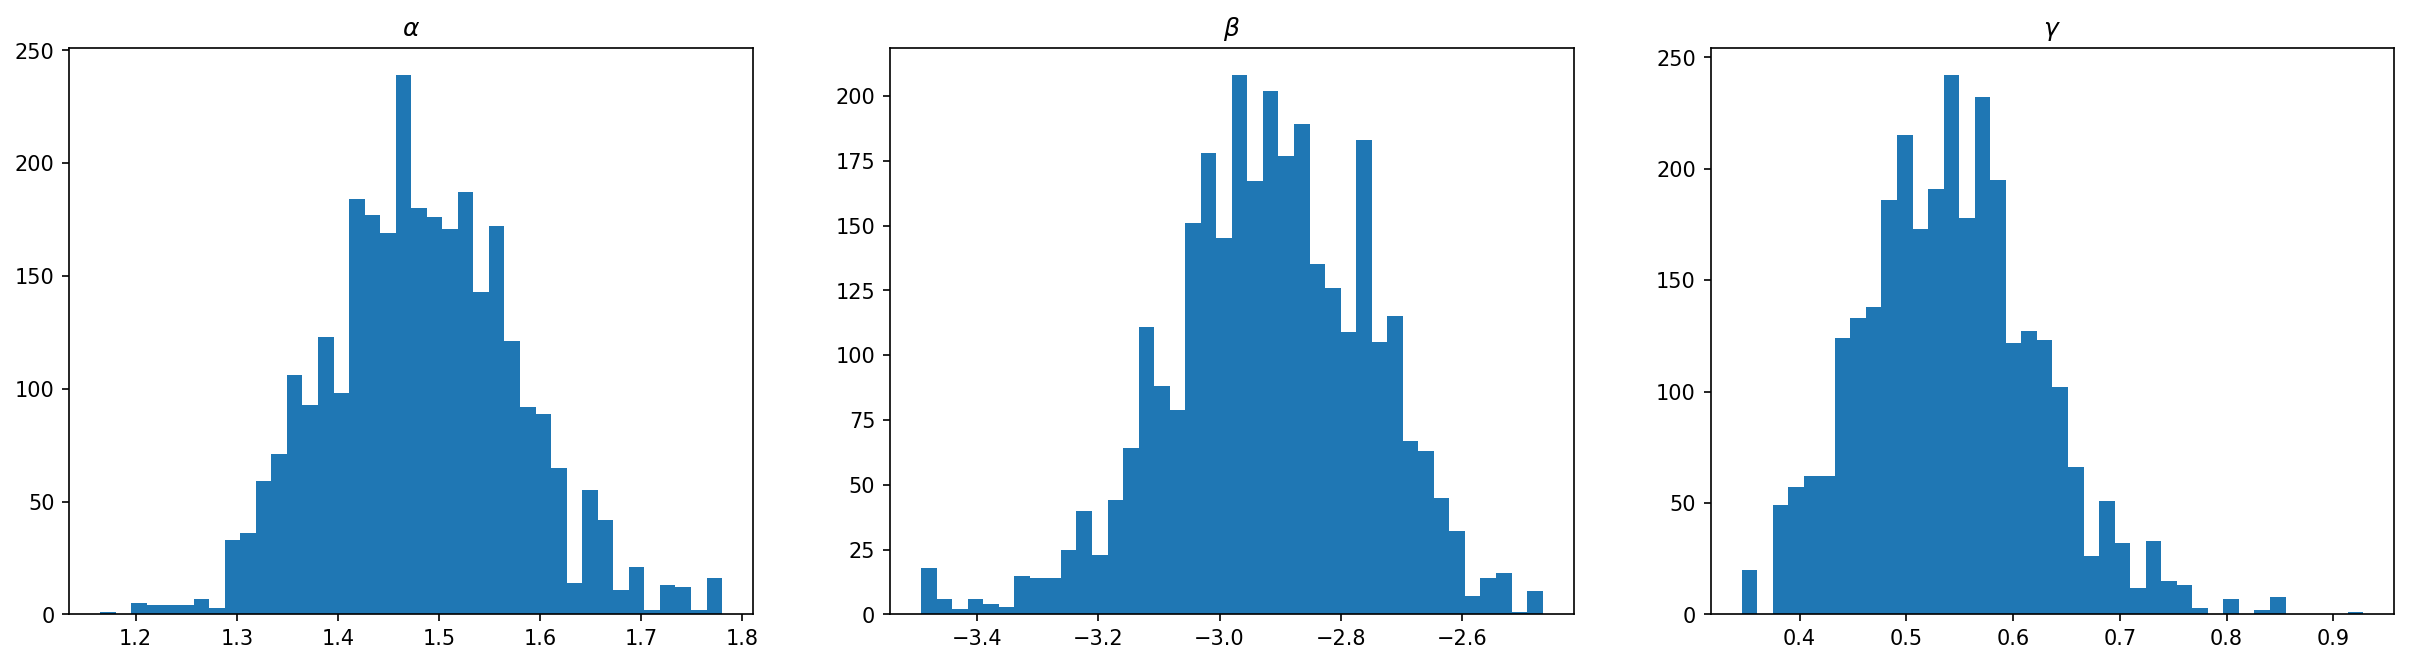

In [14]:
param_samples = onp.array(param_samples)

plt.figure(figsize = (20,5), dpi = 150)
plt.subplot(1, 3, 1)
plt.title(r'$\alpha$')
plt.hist(param_samples[:, 0].flatten(), bins = 40)
plt.subplot(1, 3, 2)
plt.title(r'$\beta$')
plt.hist(param_samples[:, 1].flatten(), bins = 40)
plt.subplot(1, 3, 3)
plt.title(r'$\gamma$')
plt.hist(param_samples[:, 2].flatten(), bins = 40)

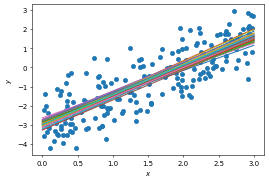

In [15]:
# Drawing lines using the samples we have:
plt.figure(dpi = 50)
plt.scatter(xs, ys, label='Data')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

for i in onp.random.randint(0, 3000, size = 50):
    plt.plot(onp.linspace(x_min, x_max), 
            param_samples[i,0] * onp.linspace(x_min, x_max) + param_samples[i,1]
           )